<a href="https://colab.research.google.com/github/mcalmeida13/marketing-attribution-model/blob/main/marketing_attribution_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import subprocess

In [ ]:
path = 'https://raw.githubusercontent.com/mcalmeida13/marketing-attribution-model/main/Channel_attribution.csv'
df = pd.read_csv(path)
df

,R05A.01,R05A.02,R05A.03,R05A.04,R05A.05,R05A.06,R05A.07,R05A.08,R05A.09,R05A.10,R05A.11,R05A.12,R05A.13,R05A.14,R05A.15,R05A.16,R05A.17,R05A.18,R05A.19,R05A.20,Output
0,16,4,3.0,5.0,10.0,8.0,6.0,8.0,13.0,20.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,9.0,10.0,1.0,4.0,3.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,13,20.0,16.0,15.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,15,20.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16,9,13.0,20.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,4,4,5.0,12.0,13.0,2.0,20.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2388,9,16,17.0,15.0,20.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2389,10,6,5.0,4.0,2.0,9.0,20.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2390,10,6,11.0,20.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns: Engaged activities

Rows: Channels that were engaged with, in chronological order. In this case, each marketing channel is assigned a fixed numbered value which is then displayed in a column n if the n’th engagement from a given user was with that marketing channel. 

Channel 21 is a conversion and our dataset only contains records of converting user journeys.


In [ ]:
cols = df.columns
cols

Index(['R05A.01', 'R05A.02', 'R05A.03', 'R05A.04', 'R05A.05', 'R05A.06',
       'R05A.07', 'R05A.08', 'R05A.09', 'R05A.10', 'R05A.11', 'R05A.12',
       'R05A.13', 'R05A.14', 'R05A.15', 'R05A.16', 'R05A.17', 'R05A.18',
       'R05A.19', 'R05A.20', 'Output'],
      dtype='object')

In [ ]:
#Transform the dataset entry into string and remove '.0'
for col in cols:
  df[col] = df[col].astype(str)
  df[col] = df[col].apply(lambda x: x.replace('.0',''))

In [ ]:
df.head()

,R05A.01,R05A.02,R05A.03,R05A.04,R05A.05,R05A.06,R05A.07,R05A.08,R05A.09,R05A.10,R05A.11,R05A.12,R05A.13,R05A.14,R05A.15,R05A.16,R05A.17,R05A.18,R05A.19,R05A.20,Output
0,16,4,3,5,10,8,6,8,13,20,21,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,2,1,9,10,1,4,3,21,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,9,13,20,16,15,21,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,8,15,20,21,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,16,9,13,20,21,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [ ]:
#Create a total path variable
df['Path'] = ''
for i in df.index:
  for x in cols:
    df.at[i,'Path'] = df.at[i,'Path'] + df.at[i,x] + ' > '

In [ ]:
df.head()

,R05A.01,R05A.02,R05A.03,R05A.04,R05A.05,R05A.06,R05A.07,R05A.08,R05A.09,R05A.10,R05A.11,R05A.12,R05A.13,R05A.14,R05A.15,R05A.16,R05A.17,R05A.18,R05A.19,R05A.20,Output,Path
0,16,4,3,5,10,8,6,8,13,20,21,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,16 > 4 > 3 > 5 > 10 > 8 > 6 > 8 > 13 > 20 > 21...
1,2,1,9,10,1,4,3,21,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2 > 1 > 9 > 10 > 1 > 4 > 3 > 21 > nan > nan > ...
2,9,13,20,16,15,21,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,9 > 13 > 20 > 16 > 15 > 21 > nan > nan > nan >...
3,8,15,20,21,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,8 > 15 > 20 > 21 > nan > nan > nan > nan > nan...
4,16,9,13,20,21,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,16 > 9 > 13 > 20 > 21 > nan > nan > nan > nan ...


In [ ]:
# Remove conversion (channel 21)
df['Path'] = df['Path'].apply(lambda x: x.split(' > 21')[0])

#Create a conversion column
df['Conversion'] = 1

df.head()

,R05A.01,R05A.02,R05A.03,R05A.04,R05A.05,R05A.06,R05A.07,R05A.08,R05A.09,R05A.10,R05A.11,R05A.12,R05A.13,R05A.14,R05A.15,R05A.16,R05A.17,R05A.18,R05A.19,R05A.20,Output,Path,Conversion
0,16,4,3,5,10,8,6,8,13,20,21,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,16 > 4 > 3 > 5 > 10 > 8 > 6 > 8 > 13 > 20,1
1,2,1,9,10,1,4,3,21,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2 > 1 > 9 > 10 > 1 > 4 > 3,1
2,9,13,20,16,15,21,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,9 > 13 > 20 > 16 > 15,1
3,8,15,20,21,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,8 > 15 > 20,1
4,16,9,13,20,21,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,16 > 9 > 13 > 20,1


In [ ]:
df_clean = df[['Path','Conversion']]

# Sum conversion by path
df_clean = df_clean.groupby('Path').sum().reset_index()

df_clean

,Path,Conversion
0,1 > 1 > 1 > 20,1
1,1 > 1 > 12 > 12,1
2,1 > 1 > 14 > 13 > 12 > 20,1
3,1 > 1 > 3 > 13 > 3 > 20,1
4,1 > 1 > 3 > 17 > 17,1
...,...,...
1901,9 > 9 > 4 > 3 > 9 > 20,1
1902,9 > 9 > 4 > 6 > 4,1
1903,9 > 9 > 5 > 13 > 16,1
1904,9 > 9 > 6,1


In [ ]:
path = '1 > 1 > 3 > 17 > 17 >'

In [ ]:
path.split(' > ')[0]

'1'

In [ ]:
path.split(' >')[-2]

' 17'

# First Click

In [ ]:
df_first = pd.DataFrame()

df_first['first_interaction'] = df_clean['Path'].apply(lambda x: x.split(' > ')[0])
df_first['Channel'] = df_first['first_interaction']
df_first['Conversion'] = 1
df_first['Attribution'] = 'First Click'
df_first.head()

,first_interaction,Channel,Conversion,Attribution
0,1,1,1,First Click
1,1,1,1,First Click
2,1,1,1,First Click
3,1,1,1,First Click
4,1,1,1,First Click


In [ ]:
  #COLLECT COUNTS
df_first_grouped = df_first.groupby(df_first.columns.tolist()).size().reset_index().rename(columns={0:'records'}).sort_values(by='records',ascending=False)
df_first_grouped.head()

,first_interaction,Channel,Conversion,Attribution,records
1,10,10,1,First Click,440
4,13,13,1,First Click,245
18,9,9,1,First Click,176
13,4,4,1,First Click,167
11,2,2,1,First Click,166


In [ ]:
def plot_graph(col,df=df):
    sns.set_style("whitegrid")
    plt.figure(figsize=(15,5))
    graph=sns.countplot(x=col, data=df,order=pd.value_counts(df[col]).iloc[:15].index,palette='viridis')
    plt.setp(graph.get_xticklabels(), rotation=30)
    plt.tight_layout

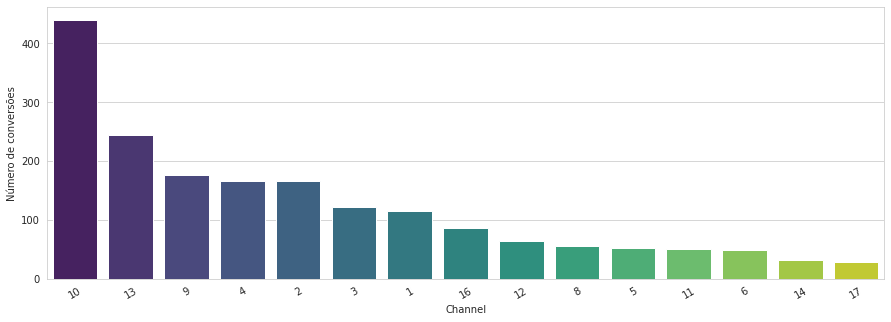

In [ ]:
plot_graph('Channel',df_first)
plt.ylabel('Número de conversões')
# plt.savefig("utm_source")
plt.show()

# Last Click

In [ ]:
df_last = pd.DataFrame()

df_last['last_interaction'] = df_clean['Path'].apply(lambda x: x.split(' > ')[-1])
df_last['Channel'] = df_last['last_interaction']
df_last['Conversion'] = 1
df_last['Attribution'] = 'Last Click'
df_last.head()

,last_interaction,Channel,Conversion,Attribution
0,20,20,1,Last Click
1,12,12,1,Last Click
2,20,20,1,Last Click
3,20,20,1,Last Click
4,17,17,1,Last Click


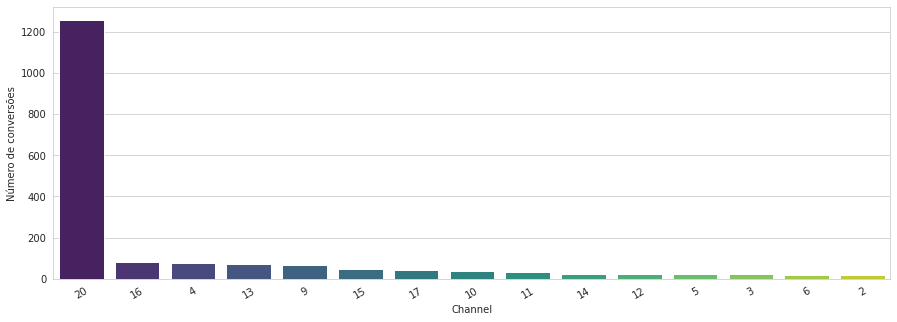

In [ ]:
plot_graph('Channel',df_last)
plt.ylabel('Número de conversões')
# plt.savefig("utm_source")
plt.show()

<function matplotlib.pyplot.tight_layout>

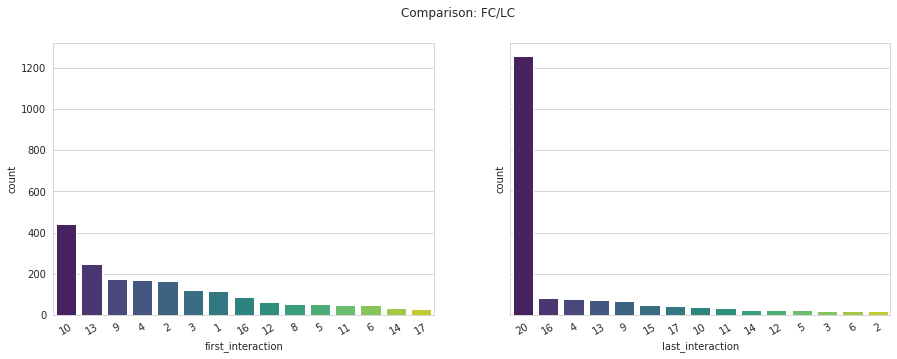

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Comparison: FC/LC')

# First Click
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
graph=sns.countplot(ax=axes[0],x='first_interaction', data=df_first,order=pd.value_counts(df_first['first_interaction']).iloc[:15].index,palette='viridis')
plt.setp(graph.get_xticklabels(), rotation=30)
plt.tight_layout

# Last Click
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
graph=sns.countplot(ax=axes[1],x='last_interaction', data=df_last,order=pd.value_counts(df_last['last_interaction']).iloc[:15].index,palette='viridis')
plt.setp(graph.get_xticklabels(), rotation=30)
plt.tight_layout


#Linear Model

In [ ]:
channel = []
conversion = []
for i in df_clean.index:
    for j in df_clean.at[i, 'Path'].split(' > '):
        channel.append(j)
        conversion.append(1/len(df_clean.at[i, 'Path'].split(' > ')))
df_linear_model = pd.DataFrame()
df_linear_model['Channel'] = channel
df_linear_model['Attribution'] = 'Linear'
df_linear_model['Conversion'] = conversion
df_linear_model = df_linear_model.groupby(['Channel']).sum().reset_index()

In [ ]:
df_linear_model.head()

,Channel,Conversion
0,1,66.873661
1,10,168.222393
2,11,88.625714
3,12,67.961197
4,13,161.356219


<function matplotlib.pyplot.tight_layout>

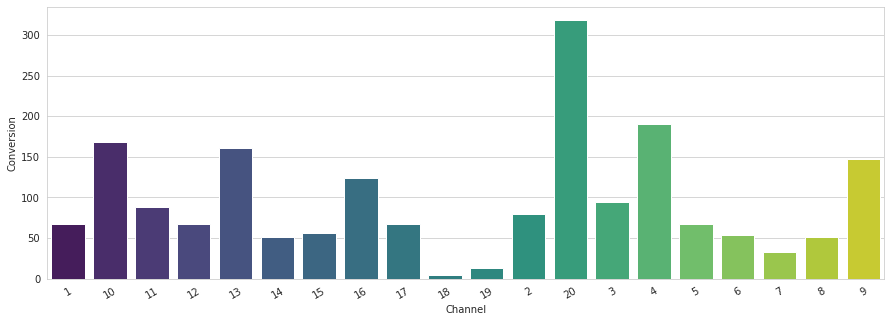

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
graph= sns.barplot(x="Channel", y="Conversion", data=df_linear_model, palette='viridis')
plt.setp(graph.get_xticklabels(), rotation=30)
plt.tight_layout

<function matplotlib.pyplot.tight_layout>

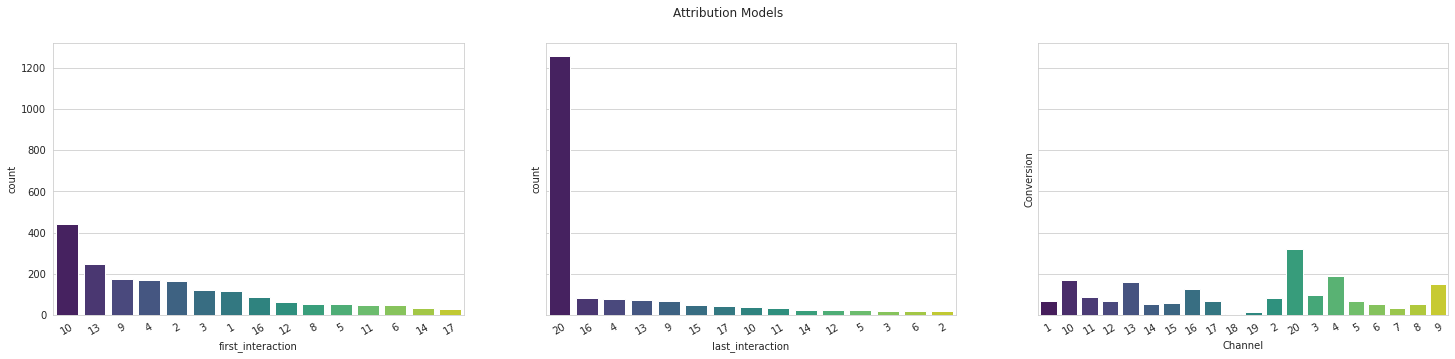

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(25, 5), sharey=True)
fig.suptitle('Attribution Models')

# First Click
sns.set_style("whitegrid")
graph=sns.countplot(ax=axes[0],x='first_interaction', data=df_first,order=pd.value_counts(df_first['first_interaction']).iloc[:15].index,palette='viridis')
plt.setp(graph.get_xticklabels(), rotation=30)
plt.tight_layout

# Last Click
sns.set_style("whitegrid")
graph=sns.countplot(ax=axes[1],x='last_interaction', data=df_last,order=pd.value_counts(df_last['last_interaction']).iloc[:15].index,palette='viridis')
plt.setp(graph.get_xticklabels(), rotation=30)
plt.tight_layout

# Linear Model
sns.set_style("whitegrid")
graph= sns.barplot(x="Channel", y="Conversion", data=df_linear_model, palette='viridis')
plt.setp(graph.get_xticklabels(), rotation=30)
plt.tight_layout

# Markov Chain